In [35]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.shape

(2823, 25)

In [6]:
df.isnull().any().sum()

4

In [7]:
df = df.dropna()

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small


In [14]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [12]:
def barplot(data, variable):
    """
    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        country_variable (str): The name of the variable to be plotted on the y-axis.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(y=variable, data=data)
    plt.title("Bar Plot of {}".format(variable))
    plt.xlabel("Count")
    plt.ylabel(variable)
    plt.show()

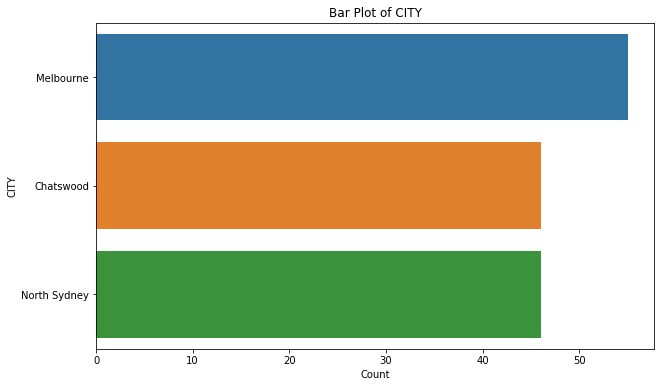

In [13]:
barplot(df, 'CITY')

In [15]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [17]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,5,1,1,2,2004,...,1,1,1,1,2,0,0,0,2,1
21,10361,20,72.55,13,1451.00,4,1,4,12,2004,...,2,2,0,0,1,0,0,1,0,2
40,10270,21,100.00,9,4905.39,11,1,3,7,2004,...,2,2,0,0,1,0,0,1,0,1
47,10347,30,100.00,1,3944.70,2,1,4,11,2004,...,1,1,1,1,2,0,0,0,2,1
51,10391,24,100.00,4,2416.56,6,1,1,3,2005,...,0,0,2,0,0,0,0,2,1,2


In [25]:
def scatter(data, variable1, variable2):
    """
    Plot a scatter plot using Seaborn.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        variable (str): The name of the variable representing the price.
        variable (str): The name of the variable representing the sales.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=variable1, y=variable2, data=data)
    plt.title("Scatter Plot of {} vs {}".format(variable1, variable2))
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.show()

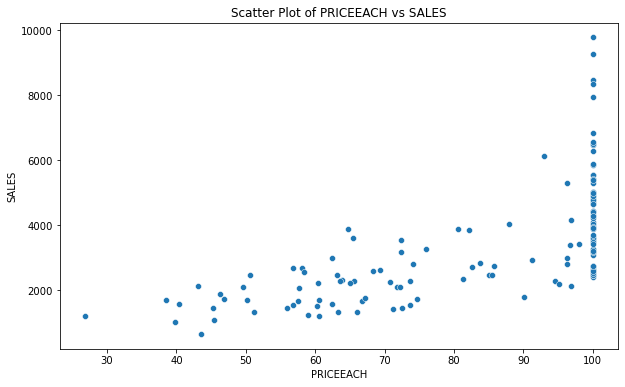

In [26]:
scatter(df, 'PRICEEACH', 'SALES')

In [30]:
df.PRICEEACH.describe()

count    147.000000
mean      84.138639
std       19.897255
min       26.880000
25%       66.390000
50%       98.050000
75%      100.000000
max      100.000000
Name: PRICEEACH, dtype: float64

In [31]:
df.SALES.describe()

count     147.000000
mean     3446.003537
std      1717.988835
min       652.350000
25%      2249.005000
50%      3160.740000
75%      4410.060000
max      9774.030000
Name: SALES, dtype: float64

In [33]:
def box_plot(data):
    """
    Plots a box plot for the variables 'PRICEEACH' and 'SALES' in a single figure.

    Parameters:
    data (DataFrame): DataFrame containing the data with columns 'PRICEEACH' and 'SALES'.

    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[['PRICEEACH', 'SALES']])
    plt.title('Box Plot of PRICEEACH and SALES')
    plt.xlabel('Variables')
    plt.ylabel('Values')
    plt.show()

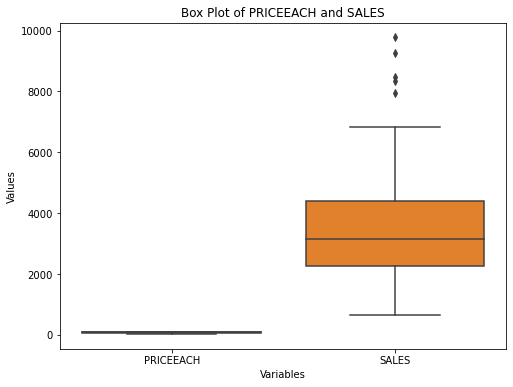

In [36]:
box_plot(df)

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['PRICEEACH', 'SALES']])

In [42]:
max_clusters = 10
silhouette_scores = [silhouette_score(scaled_features, KMeans(n_clusters=k, random_state=42).fit_predict(scaled_features)) for k in range(2, max_clusters + 1)]

In [43]:
def silhouette(silhouette_scores, max_clusters):
    """
    Plot silhouette scores for different numbers of clusters.

    Parameters:
        silhouette_scores
        max_clusters = 10
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()

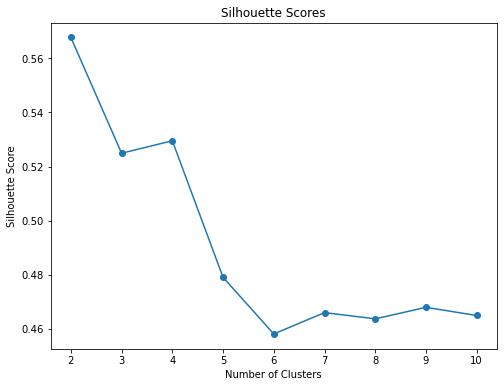

In [44]:
silhouette(silhouette_scores, max_clusters)

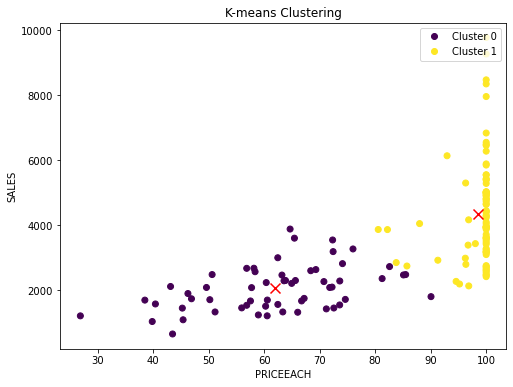

In [52]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['PRICEEACH', 'SALES']])

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PRICEEACH'], df['SALES'], c=cluster_labels, cmap='viridis', label='Data Points')
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='red', label='Cluster Centres')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.title('K-means Clustering')
plt.legend(scatter.legend_elements()[0], ['Cluster 0', 'Cluster 1', 'Cluster Centers'], loc='upper right')
plt.show()

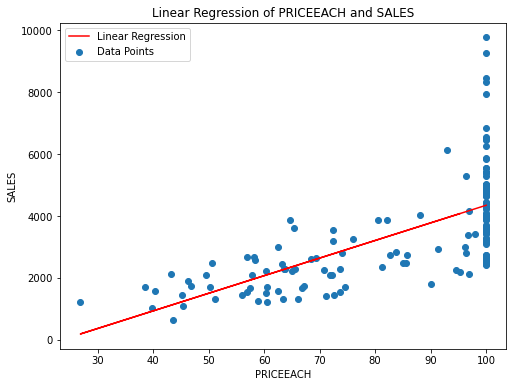

In [58]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(df[['PRICEEACH']], df['SALES'])
predictions = regression.predict(df[['PRICEEACH']])

plt.figure(figsize=(8, 6))
plt.scatter(df['PRICEEACH'], df['SALES'], label='Data Points')
plt.plot(df['PRICEEACH'], predictions, color='red', label='Linear Regression')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.title('Linear Regression of PRICEEACH and SALES')
plt.legend()
plt.show()